# Projeto de Extensão

## Importação e tratamento de dados

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# Carregando o dataset
df = pd.read_csv('Bechdel_IMDB.csv')

In [ ]:
# Visualizando as informações básicas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              9718 non-null   object 
 1   year               9718 non-null   int64  
 2   imdbid             9718 non-null   float64
 3   id                 9718 non-null   int64  
 4   bechdelRating      9718 non-null   int64  
 5   imdbAverageRating  9718 non-null   float64
 6   numVotes           9718 non-null   float64
 7   runtimeMinutes     9718 non-null   object 
 8   genre1             9718 non-null   object 
 9   genre2             8446 non-null   object 
 10  genre3             5807 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 835.3+ KB


In [ ]:
# Carregando uma amostra dos dados
df.sample(10)

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,genre1,genre2,genre3
5100,"Mist, The",2007,884328.0,3324,3,7.1,341680.0,126,Horror,Sci-Fi,Thriller
4017,Hysterical Blindness,2002,290664.0,10141,3,6.5,3403.0,99,Drama,NaN,NaN
3986,Death to Smoochy,2002,266452.0,3049,2,6.3,42701.0,109,Comedy,Crime,Drama
8752,Rafiki,2018,8286894.0,8596,3,6.8,3311.0,83,Drama,Romance,NaN
3964,Big Girls Don&#39;t Cry,2002,291213.0,6810,3,6.8,1798.0,87,Drama,NaN,NaN
2984,Braveheart,1995,112573.0,205,2,8.3,1093848.0,178,Biography,Drama,War
8317,"Big Sick, The",2017,5462602.0,7720,3,7.5,143883.0,120,Comedy,Drama,Romance
1360,A New Leaf,1971,67482.0,9123,3,7.3,7674.0,102,Comedy,Romance,NaN
7381,God&#39;s Not Dead,2014,2528814.0,5337,3,4.6,45064.0,113,Adventure,Comedy,Drama
6682,Journey to the Christmas Star,2012,2034761.0,6608,3,5.7,1754.0,80,Adventure,Family,Fantasy


In [ ]:
# Renomeando colunas para facilitar a manipulação
df= df.rename(columns={
    'imdbid' : 'imdb_id',
    'id' : 'movie_id', 
    'bechdelRating' : 'bechdel_rating',
    'imdbAverageRating' : 'imdb_avg_rating',
    'numVotes' : 'num_votes',
    'runtimeMinutes' : 'runtime_minutes'
    })

rows_to_drop = df[df['runtime_minutes'] == '\\N'] # Filtro para excluir linhas com runtime inválido — Método 1
df = df.drop(rows_to_drop.index) # Excluindo linhas com runtime inválido — Método 1 
df = df.drop(columns=['genre3'])  # Excluindo coluna desnecessária
df = df[df['year'] >= 1970] # Excluindo linhas com ano menor que 1970 — Método 2
df['runtime_minutes'] = df['runtime_minutes'].astype(int)  # Convertendo a coluna runtime para inteiro

In [ ]:
#Verificando duplicatas
df.duplicated().sum()

0

In [ ]:
# Carregando as informações básicas do dataset após o tratamento
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8397 entries, 1313 to 9717
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            8397 non-null   object 
 1   year             8397 non-null   int64  
 2   imdb_id          8397 non-null   float64
 3   movie_id         8397 non-null   int64  
 4   bechdel_rating   8397 non-null   int64  
 5   imdb_avg_rating  8397 non-null   float64
 6   num_votes        8397 non-null   float64
 7   runtime_minutes  8397 non-null   int32  
 8   genre1           8397 non-null   object 
 9   genre2           7317 non-null   object 
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 688.8+ KB


## Análise Exploratória de Dados

#### Objetivo: compreender a distribuição geral dos filmes no tempo e no espaço.

In [8]:
# Verificando o ano mais antigo e o mais recente
year_min = df['year'].min()
year_max = df['year'].max()

print(f'O ano mínimo é {year_min} e o ano máximo é {year_max}.')

O ano mínimo é 1970 e o ano máximo é 2024.


In [9]:
# Verificando a nota máxima do teste de bechdel
bechdel_max = df['bechdel_rating'].max()
bechdel_min = df['bechdel_rating'].min()
print(f'A classificação Bechdel máxima é {bechdel_max} e a mínima é {bechdel_min}.')

A classificação Bechdel máxima é 3 e a mínima é 0.


In [10]:
# Verificando o filme com a maior e menor nota
max_rating = df['imdb_avg_rating'].max()
min_rating = df['imdb_avg_rating'].min()

print(f'A classificação IMDB máxima é {max_rating} e a mínima é {min_rating}.')

A classificação IMDB máxima é 9.3 e a mínima é 1.2.


In [11]:
# Verificando o maior e o menor número de votos em um filme
max_numvotes = df['num_votes'].max()
min_numvotes = df['num_votes'].min()

print(f'O número máximo de votos em um filme é {max_numvotes} e o mínimo é {min_numvotes}.')

O número máximo de votos em um filme é 2899202.0 e o mínimo é 9.0.


In [12]:
# Verificando a maior e a menor duração de um filme
max_runtime = df['runtime_minutes'].max()
min_runtime = df['runtime_minutes'].min()

print(f'A duração máxima é {max_runtime} minutos e a mínima é {min_runtime} minutos.')

A duração máxima é 1440 minutos e a mínima é 25 minutos.


In [13]:
# Verificando a quantidade de filmes lançados por década
conditions = [
    (df['year'] < 1980),
    (df['year'] >= 1980) & (df['year'] < 1990),
    (df['year'] >= 1990) & (df['year'] < 2000),
    (df['year'] >= 2000) & (df['year'] < 2010),
    (df['year'] >= 2010) & (df['year'] < 2020),
    (df['year'] >= 2020)
]
choices = ['70s', '80s', '90s', '00s', '2010s', '2020s']

df['decade'] = np.select(conditions, choices)
df.groupby('decade')['movie_id'].count().sort_values(ascending=False)

decade
2010s    3280
00s      2189
90s      1123
80s       702
2020s     629
70s       474
Name: movie_id, dtype: int64

In [14]:
# Distribuição de filmes por gênero cinematográfico.
genres = pd.concat([df['genre1'], df['genre2']])
genres = genres.dropna()
genres.value_counts().sort_values(ascending=False)


Drama          4117
Comedy         2851
Action         1804
Adventure      1496
Crime          1067
Horror          823
Romance         615
Biography       508
Mystery         449
Animation       434
Thriller        333
Fantasy         295
Family          225
Sci-Fi          188
Music           145
Documentary      95
History          94
Musical          55
Sport            47
War              41
Western          26
Adult             2
\N                2
News              2
Name: count, dtype: int64

In [15]:
# Distribuição de filmes por classificação Bechdel.
df.groupby('bechdel_rating')['movie_id'].count()

bechdel_rating
0     706
1    1874
2     830
3    4987
Name: movie_id, dtype: int64

## Representatividade Feminina — Panorama Geral


#### Objetivo: avaliar a presença e evolução da representatividade feminina no cinema.

In [16]:
# Proporção de filmes que passam vs. falham no Bechdel Test (geral).
passam = (df['bechdel_rating'] == 3).sum()
falham = (df['bechdel_rating'] < 3).sum()
bechdel_insights = pd.DataFrame({'Resultado': ['Passam', 'Falham'],'Quantidade': [passam, falham]})
bechdel_insights['Percentual'] = (bechdel_insights['Quantidade'] / bechdel_insights['Quantidade'].sum() * 100).round(2).astype(str) + '%'
bechdel_insights

,Resultado,Quantidade,Percentual
0,Passam,4987,59.39%
1,Falham,3410,40.61%


In [17]:
# Proporção por década → evolução temporal da visibilidade feminina.
df['passed'] = df['bechdel_rating'] == 3
decade_insights = df.groupby('decade')['passed'].agg(['count','mean']).reset_index()
decade_insights.rename(columns={'count':'Total de Filmes','mean':'Percentual que Passam'}, inplace=True)
decade_insights['Percentual que Passam'] = (decade_insights['Percentual que Passam'] * 100).round(2)
decade_insights

,decade,Total de Filmes,Percentual que Passam
0,00s,2189,59.30
1,2010s,3280,62.87
2,2020s,629,70.75
3,70s,474,45.15
4,80s,702,50.85
5,90s,1123,54.41


In [18]:
# Distribuição de resultados do teste por gênero de filme (De acordo com seu gênero principal).
genre_insights = decade_insights = df.groupby('genre1')['passed'].agg(['count', 'mean']).sort_values('mean',ascending=False).reset_index()
genre_insights.rename(columns={'count': 'Total de Filmes', 'mean': 'Percentual que Passam'}, inplace=True)
genre_insights['Percentual que Passam'] = (genre_insights['Percentual que Passam'] * 100).round(2)
genre_insights

,genre1,Total de Filmes,Percentual que Passam
0,Adult,2,100.00
1,Musical,2,100.00
2,Music,1,100.00
3,History,1,100.00
4,Fantasy,46,78.26
5,Horror,430,73.26
6,Family,11,72.73
7,Romance,7,71.43
8,Drama,1885,66.47
9,Comedy,2295,66.19


## Relação entre Representatividade e Sucesso

#### Objetivo: investigar se há relação entre boa representatividade e boas avaliações.

In [19]:
# Nota média no IMDb por categoria do Bechdel Test.
good_rates = df.groupby('bechdel_rating')['imdb_avg_rating'].mean().round(2).reset_index()
good_rates

,bechdel_rating,imdb_avg_rating
0,0,6.62
1,1,6.63
2,2,6.54
3,3,6.41


In [20]:
# Comparação das notas médias ao longo das décadas para filmes aprovados e reprovados.
decades_rating = df.groupby(['decade', 'passed'])['imdb_avg_rating'].agg(['count','mean']).round(2).reset_index()
decades_rating.rename(columns={'mean':'Média das Notas','count':'Total de Filmes'}, inplace=True)
decades_rating['Resultado no Bechdel Test'] = decades_rating['passed'].map({
    True: 'Passam',
    False: 'Falham'
})
decades_rating.drop(columns='passed', inplace=True)
decades_rating

,decade,Total de Filmes,Média das Notas,Resultado no Bechdel Test
0,00s,891,6.57,Falham
1,00s,1298,6.42,Passam
2,2010s,1218,6.47,Falham
3,2010s,2062,6.31,Passam
4,2020s,184,6.38,Falham
5,2020s,445,6.40,Passam
6,70s,260,6.98,Falham
7,70s,214,6.63,Passam
8,80s,345,6.84,Falham
9,80s,357,6.53,Passam


In [21]:
# Verificando se filmes com melhor representação feminina têm maior número de votos ou popularidade.
votes_insights = df.groupby('bechdel_rating')['num_votes'].agg(['sum', 'count','mean', 'median']).reset_index().sort_values('bechdel_rating')
votes_insights.rename(columns={
    'sum':'Total de Votos',
    'count':'Número de Filmes',
    'mean':'Média de Votos',
    'median':'Mediana de Votos'
}, inplace=True)
votes_insights['Média de Votos'] = votes_insights['Média de Votos'].round(1)
votes_insights['Mediana de Votos'] = votes_insights['Mediana de Votos'].round(1)
votes_insights

,bechdel_rating,Total de Votos,Número de Filmes,Média de Votos,Mediana de Votos
0,0,65436011.0,706,92685.6,27278.5
1,1,244121977.0,1874,130267.9,48901.0
2,2,91418461.0,830,110142.7,42323.5
3,3,426351828.0,4987,85492.6,23507.0


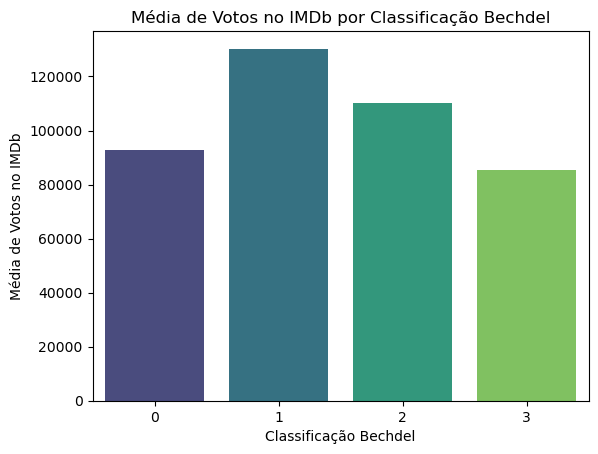

In [22]:
sns.barplot(data=votes_insights, x='bechdel_rating',y='Média de Votos', palette='viridis')
plt.title('Média de Votos no IMDb por Classificação Bechdel')
plt.xlabel('Classificação Bechdel')
plt.ylabel('Média de Votos no IMDb')
plt.show()


## Destaques e Casos Específicos

#### Objetivo: ilustrar a análise com exemplos reais e reforçar o aspecto qualitativo.

In [23]:
# Listando filmes que se destacam positivamente no Bechdel (altas notas e aprovação).
passed_movies = df[df['bechdel_rating'] == 3]

top_passed = passed_movies[['title','year','genre1','imdb_avg_rating','num_votes','runtime_minutes']].sort_values(['imdb_avg_rating','num_votes'], ascending=False)
top_passed.head(10)

,title,year,genre1,imdb_avg_rating,num_votes,runtime_minutes
5261,"Dark Knight, The",2008,Action,9.0,2880321.0,152
2833,Schindler&#39;s List,1993,Biography,9.0,1455732.0,195
2934,Pulp Fiction,1994,Crime,8.9,2227934.0,154
5870,"Clock, The",2010,Drama,8.9,355.0,1440
5959,Inception,2010,Action,8.8,2559558.0,148
4036,"Lord of the Rings: The Two Towers, The",2002,Action,8.8,1789600.0,179
7423,Interstellar,2014,Adventure,8.7,2111636.0,169
3552,"Matrix, The",1999,Action,8.7,2060255.0,136
2517,Goodfellas,1990,Biography,8.7,1261614.0,145
9499,"Legend of Maula Jatt, The",2022,Action,8.7,10595.0,153


In [24]:
# Listando filmes populares que falham no teste, mostrando o contraste.
reproved_movies = df[df['bechdel_rating'] != 3]

top_reproved = reproved_movies[['title', 'year', 'genre1', 'imdb_avg_rating', 'num_votes','runtime_minutes','bechdel_rating']].sort_values(['imdb_avg_rating', 'num_votes'], ascending=False)
top_reproved.head(10)


,title,year,genre1,imdb_avg_rating,num_votes,runtime_minutes,bechdel_rating
2947,"Shawshank Redemption, The",1994,Drama,9.3,2899202.0,142,0
1436,"Godfather, The",1972,Crime,9.2,2019978.0,175,2
4215,"Lord of the Rings: The Return of the King, The",2003,Action,9.0,1985360.0,201,1
1543,"Godfather: Part II, The",1974,Crime,9.0,1368369.0,202,2
3853,"Lord of the Rings: The Fellowship of the Ring,...",2001,Action,8.9,2013610.0,178,1
3525,Fight Club,1999,Drama,8.8,2332949.0,139,1
2891,Forrest Gump,1994,Drama,8.8,2265643.0,142,1
1829,Star Wars: Episode V - The Empire Strikes Back,1980,Action,8.7,1383981.0,124,0
1596,One Flew Over the Cuckoo&#39;s Nest,1975,Drama,8.7,1075090.0,133,2
3068,Se7en,1995,Crime,8.6,1805462.0,127,1


In [25]:
# Identificando possíveis mudanças de tendência em períodos marcantes (ex: após 2000 ou 2010).

# Criando uma coluna categórica para períodos
df['period'] = pd.cut(
    df['year'],
    bins=[0, 1999, 2009, 2019, 2024],
    labels=['Até 1999', '2000-2009', '2010-2019', '2020+']
)

# Agrupamento por período
comparison = (df.groupby('period').agg(n_filmes=('passed', 'count'),percentual_passam=('passed', lambda x: x.mean() * 100), percentual_falham=('passed', lambda x: (1 - x.mean()) * 100)).reset_index())

# Arredondando valores
comparison[['percentual_passam', 'percentual_falham']] = comparison[['percentual_passam', 'percentual_falham']].round(2)

comparison

C:\Users\cassi\AppData\Local\Temp\ipykernel_4152\177901040.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comparison = (df.groupby('period').agg(n_filmes=('passed', 'count'),percentual_passam=('passed', lambda x: x.mean() * 100), percentual_falham=('passed', lambda x: (1 - x.mean()) * 100)).reset_index())


,period,n_filmes,percentual_passam,percentual_falham
0,Até 1999,2299,51.41,48.59
1,2000-2009,2189,59.30,40.70
2,2010-2019,3280,62.87,37.13
3,2020+,629,70.75,29.25
